<a href="https://colab.research.google.com/github/PranitShinde2711/Machine-Learning-and-Data-Science/blob/main/Mileage_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mileage Prediction - Regression Analysis**

**Source:**
This dataset was taken from Statlib library which is maintained at Carnegie Mellon university. The dataset was used in the 1983 american statistical Asssociation exposition.

**Data Set Information:**
This dataset is a slightly modified version of the dataset provided in the StatLib library.In line with the use by Ross Quinlan (1993) in predicting the attribute 'mpg', 8 of the original instances were removed because they had unknown values for the 'mpg' attribute. The original datasetis available in the file 'auto-mpg.data-original'.
"The data concerns the city-cycle fuel consumptiom in miles per gallon, to be predicted in terms of 3 multivalued descrete and 5 continuous attributes."(Quinlan,1993)

**Attribute Information:**
1.mpg:continuous
2.cylinders:multi-valued descrete
3.displacement:continuous
4.horsepower:continuous
5.weight:continuous
6.accleration:continuous
7.model year:multi-valued descrete
8.origin:multi-valued descrete
9.car name:string(unique for each instance)

**Import Library**

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

**Import data**

In [ ]:
data=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


**Data Preprocessing**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Remove missing values**

In [ ]:
data=data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

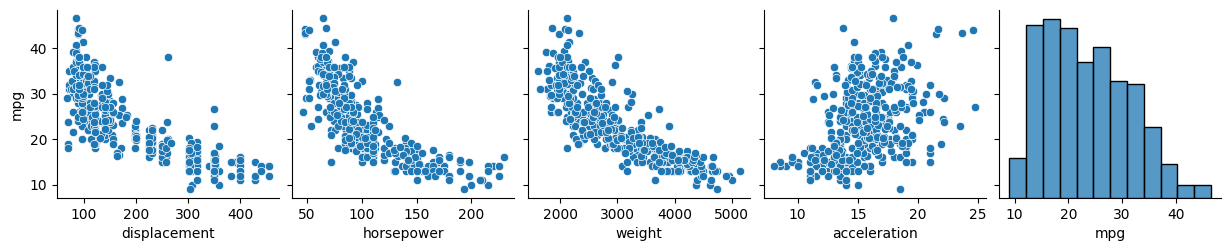

In [ ]:
sns.pairplot(data,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

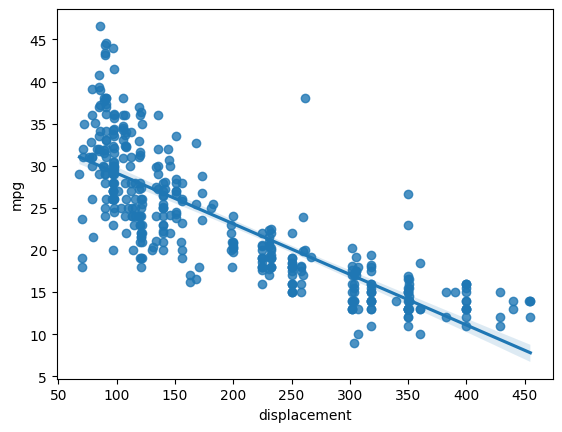

In [ ]:
sns.regplot(x='displacement',y='mpg',data=data)

**Define Target variable Y and features X**

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
Y=data['mpg']
X=data[[ 'displacement', 'horsepower', 'weight',
       'acceleration']]

In [ ]:
Y.shape

(392,)

In [ ]:
X.shape

(392, 4)

In [ ]:
X

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


**Scaling data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x=ss.fit_transform(X)

In [ ]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [ ]:
pd.DataFrame(X).describe()

,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327
std,104.644004,38.491160,849.402560,2.758864
min,68.000000,46.000000,1613.000000,8.000000
25%,105.000000,75.000000,2225.250000,13.775000
50%,151.000000,93.500000,2803.500000,15.500000
75%,275.750000,126.000000,3614.750000,17.025000
max,455.000000,230.000000,5140.000000,24.800000


**Train Test Split data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

45.10570942699835

In [ ]:
lr.coef_

array([-0.0101203 , -0.04389329, -0.00484238, -0.04171959])

**Mileage=45.10 - 0.0101displacement - 0.044horsepower - 0.0048weight -0.0417acceleration**

**Predict the test data**

In [ ]:
y_pred=lr.predict(x_test)

In [46]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

In [47]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score


In [48]:
mean_absolute_error(y_test,y_pred)

3.3286968643244115

In [49]:
mean_absolute_percentage_error(y_test,y_pred)

0.14713035779536746

In [50]:
r2_score(y_pred,y_test)

0.5918416779993556

**Polynomial Regression**

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [55]:
x_train2=poly.fit_transform(x_train)

In [56]:
x_test2=poly.fit_transform(x_test)

In [57]:
lr.fit(x_train2,y_train)

LinearRegression()

In [58]:
lr.intercept_

83.65746234327268

In [59]:
lr.coef_

array([-5.75868003e-03, -2.88386409e-01, -1.50870743e-02, -1.31734959e+00,
        3.10127340e-04, -1.40709212e-06, -3.14426164e-03,  4.14166062e-05,
       -1.63686388e-03,  6.06143149e-04])

**Model Accuracy**

In [61]:
y_pred_poly=lr.predict(x_test2)

In [60]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [62]:
mean_absolute_error(y_test,y_pred_poly)

2.788714772025469

In [63]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12074018342923652

In [64]:
r2_score(y_test,y_pred_poly)

0.7461731314567186